In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_pickle('all_banks')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (BAC, Open)    2517 non-null   float64
 1   (BAC, High)    2517 non-null   float64
 2   (BAC, Low)     2517 non-null   float64
 3   (BAC, Close)   2517 non-null   float64
 4   (BAC, Volume)  2517 non-null   int64  
 5   (C, Open)      2517 non-null   float64
 6   (C, High)      2517 non-null   float64
 7   (C, Low)       2517 non-null   float64
 8   (C, Close)     2517 non-null   float64
 9   (C, Volume)    2517 non-null   int64  
 10  (GS, Open)     2517 non-null   float64
 11  (GS, High)     2517 non-null   float64
 12  (GS, Low)      2517 non-null   float64
 13  (GS, Close)    2517 non-null   float64
 14  (GS, Volume)   2517 non-null   int64  
 15  (JPM, Open)    2517 non-null   float64
 16  (JPM, High)    2517 non-null   float64
 17  (JPM, Low)     2517 non-null   flo

In [4]:
df.sample(5)

Bank Ticker    BAC                                       C                  \
Stock Info    Open   High    Low  Close     Volume    Open    High     Low   
Date                                                                         
2006-02-21   44.71  44.83  44.51  44.55   10381400  462.00  463.70  459.70   
2007-03-13   51.08  51.08  49.26  49.46   25463400  500.10  500.90  487.50   
2008-11-14   16.84  18.04  16.20  16.42  124550618   97.60  101.10   87.90   
2015-08-03   17.91  17.96  17.64  17.77   62376780   58.62   58.67   57.95   
2013-05-01   12.20  12.27  12.08  12.14   88418671   46.48   46.58   45.64   

Bank Ticker                    ...     MS                                 \
Stock Info    Close    Volume  ...   Open   High    Low  Close    Volume   
Date                           ...                                         
2006-02-21   461.70   1395690  ...  60.90  61.28  60.51  60.77   2772000   
2007-03-13   487.50   2928670  ...  75.34  75.54  71.82  72.08  11909300   
2008-11-14    95.20  28157000  ...  12.67  13.19  11.51  12.03  34968826   
2015-08-03    58.44  10508705  ...  38.96  38.97  38.42  38.76   7078409   
2013-05-01    45.87  21948156  ...  22.11  22.11  21.68  21.85  13070744   

Bank Ticker    WFC                                 
Stock Info    Open   High    Low  Close    Volume  
Date                                               
2006-02-21   31.90  31.92  31.54  31.76   6424800  
2007-03-13   34.51  34.44  33.42  33.47  21867900  
2008-11-14   28.20  29.89  27.63  28.73  69125425  
2015-08-03   58.07  58.07  57.50  57.91  13085940  
2013-05-01   37.90  37.96  37.29  37.46  17639163  

[5 rows x 30 columns]

**What is the max Close price for each bank's stock throughout the time period?**

In [5]:
df.xs(key='Close',axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [6]:
tickers = list(df.columns.levels[0])

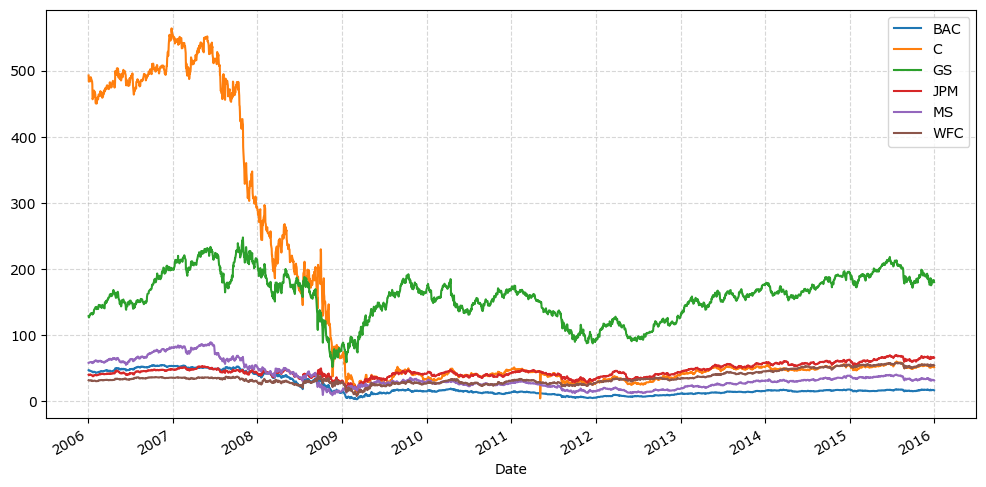

In [7]:
for tick in tickers:
    df[tick]['Close'].plot(figsize=(12,6), label=tick)

plt.legend()
plt.grid(axis='both',ls='--',alpha=0.5)

In [8]:
returns = pd.DataFrame()

In [9]:
for tick in tickers:
    returns[tick + ' Change'] = df[tick]['Close'].pct_change()

In [10]:
returns.head()

,BAC Change,C Change,GS Change,JPM Change,MS Change,WFC Change
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


**Figure out on what dates each bank stock had the best and worst single day returns**

In [11]:
returns.idxmax()

BAC Change   2009-04-09
C Change     2011-05-09
GS Change    2008-11-24
JPM Change   2009-01-21
MS Change    2008-10-13
WFC Change   2008-07-16
dtype: datetime64[ns]

In [12]:
returns.idxmin()

BAC Change   2009-01-20
C Change     2011-05-06
GS Change    2009-01-20
JPM Change   2009-01-20
MS Change    2008-10-09
WFC Change   2009-01-20
dtype: datetime64[ns]

**Riskiest stock over the entire time period**

In [13]:
returns.std()

BAC Change    0.036650
C Change      0.179969
GS Change     0.025346
JPM Change    0.027656
MS Change     0.037820
WFC Change    0.030233
dtype: float64

**2007-2009 returns of Goldman Sachs**

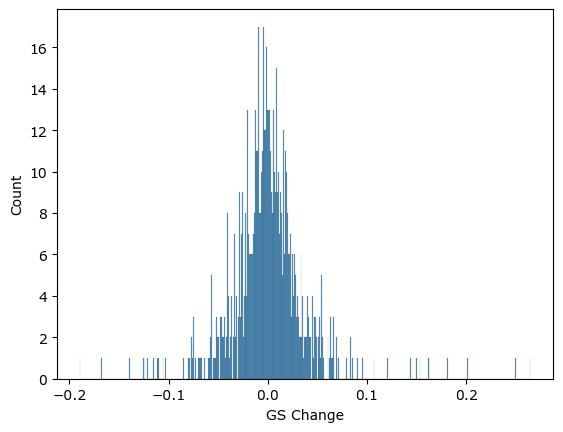

In [14]:
import warnings

warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

sns.histplot(data=returns.loc['2007-01-01':'2010-01-01']['GS Change'], bins=500)

warnings.resetwarnings()

**Ploting the 30 day Moving Average and the Close Price for Goldman Sachs' stock in the year 2008-09**

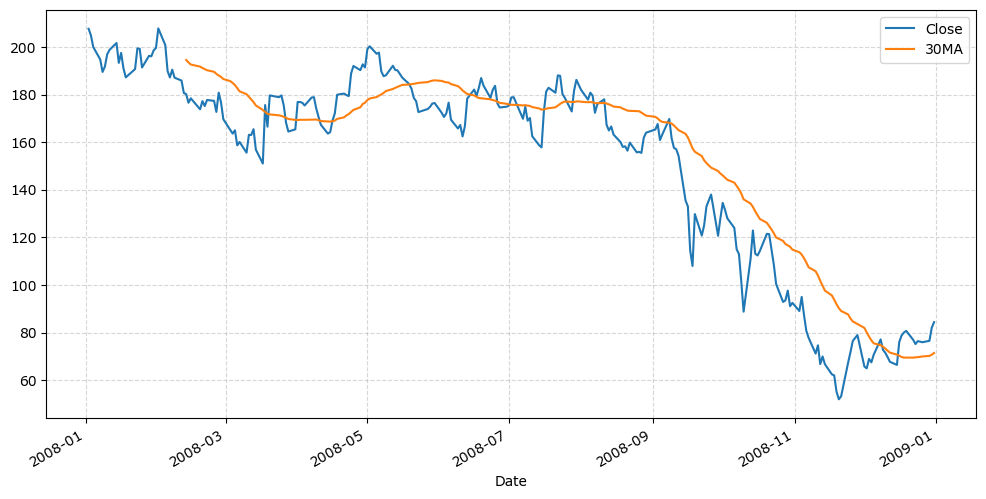

In [15]:
plt.figure(figsize=(12,6))
df['GS'].loc['2008-01-01':'2009-01-01']['Close'].plot(label='Close')
df['GS'].loc['2008-01-01':'2009-01-01']['Close'].rolling(window=30).mean().plot(label='30MA')
plt.legend()
plt.grid(axis='both',ls='--',alpha=0.5)

**Ploting the 30 day Moving Average and the Close Price for Goldman Sachs' stock in the year 2009-10**

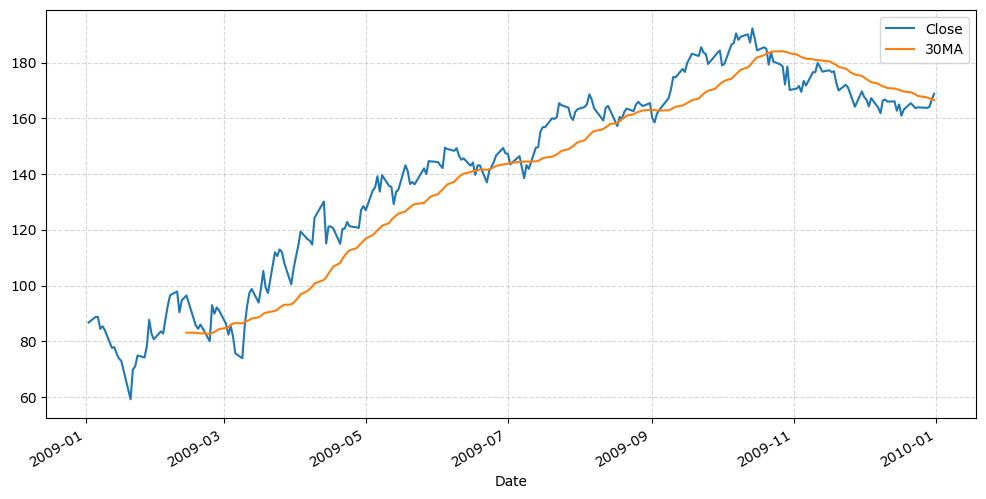

In [16]:
plt.figure(figsize=(12,6))
df['GS'].loc['2009-01-01':'2010-01-01']['Close'].plot(label='Close')
df['GS'].loc['2009-01-01':'2010-01-01']['Close'].rolling(window=30).mean().plot(label='30MA')
plt.legend()
plt.grid(axis='both',ls='--',alpha=0.5)

**Let's find out if there's a correlation between the stocks Close Price of different banks.**

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

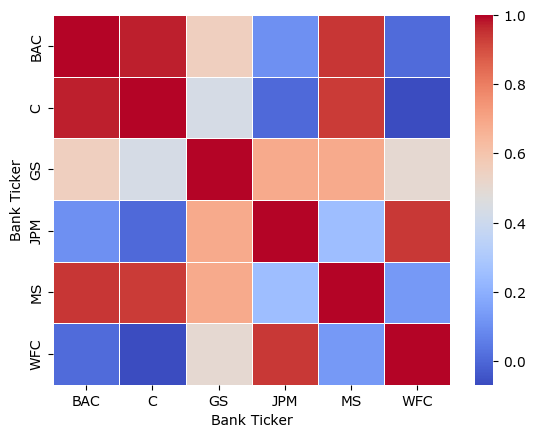

In [17]:
sns.heatmap(data=df.xs(key='Close',axis=1, level='Stock Info').corr(), cmap='coolwarm', linecolor='white', linewidths=0.5)